In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform


In [3]:
#I swear I dont understand relative paths, sorry lol
data = pd.read_csv('/Users/jonathan/Documents/Desktop/GT Master Files/Fall 2023/Machine Learning/Diversify/src/GMM/mid_gmm_final_ver/new_normalized_aggregated.csv', header=0)
symbols = data['Symbol']
print(data)

    Symbol    Volume  Market Cap  P/E Ratio      vec0      vec1      vec2  \
0      IPG  0.201484    0.806974   0.081781  0.239826  0.745115  1.561770   
1      USB  0.162781    0.862048   0.095914  0.253884  0.791067  1.811428   
2      ETR  0.152476    0.828159   0.071237  0.218468  0.773046  1.872523   
3     VRSK  0.125204    0.845854   0.022838  0.213324  0.746491  1.664183   
4      MMC  0.060214    0.882185   0.035331  0.280788  0.922148  2.002150   
..     ...       ...         ...        ...       ...       ...       ...   
497    SRE  0.085163    0.855160   0.060825  0.245355  0.868098  2.035904   
498     WM  0.074332    0.870098   0.033241  0.371892  0.937859  2.094749   
499    MMM  0.134290    0.859901   0.000000  0.245664  0.784547  1.871211   
500   CTRA  0.166738    0.827638   0.147693  0.271487  0.869133  1.958813   
501     RF  0.203229    0.815747   0.156721  0.319176  0.913098  2.014321   

         vec3      vec4  Volatility  
0   -0.729116 -0.105148      0.3571  

In [4]:
# Do some data manipulation

# maybe drop this data?
#data = data.drop(['vec0', 'vec1', 'vec2', 'vec3', 'vec4'], axis=1)
#data = data.drop(['Volume', 'Market Cap', 'P/E Ratio', 'Volatility'], axis=1)

scaler = StandardScaler()
scaled_data = data.drop('Symbol', axis=1)

print(scaled_data)

       Volume  Market Cap  P/E Ratio      vec0      vec1      vec2      vec3  \
0    0.201484    0.806974   0.081781  0.239826  0.745115  1.561770 -0.729116   
1    0.162781    0.862048   0.095914  0.253884  0.791067  1.811428 -0.859482   
2    0.152476    0.828159   0.071237  0.218468  0.773046  1.872523 -0.916396   
3    0.125204    0.845854   0.022838  0.213324  0.746491  1.664183 -0.802075   
4    0.060214    0.882185   0.035331  0.280788  0.922148  2.002150 -0.964473   
..        ...         ...        ...       ...       ...       ...       ...   
497  0.085163    0.855160   0.060825  0.245355  0.868098  2.035904 -0.950938   
498  0.074332    0.870098   0.033241  0.371892  0.937859  2.094749 -0.974375   
499  0.134290    0.859901   0.000000  0.245664  0.784547  1.871211 -0.849434   
500  0.166738    0.827638   0.147693  0.271487  0.869133  1.958813 -0.884838   
501  0.203229    0.815747   0.156721  0.319176  0.913098  2.014321 -1.005330   

         vec4  Volatility  
0   -0.1051

In [35]:
# Compute Linkage Matrix
LINKAGE = linkage(scaled_data, method='average', metric='euclidean')


plt.figure(figsize=(120, 20), dpi=300)
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(
    LINKAGE,
    labels=symbols.values,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=None  
)
plt.xlabel('Stock Symbols')
plt.ylabel('Distance')
plt.show()

In [41]:
# Try to find optimal clusters using silhoutte scores

clusters = np.arange(2, 20)
sillhouteScores = []
sillhouteError = []
iterations = 20

for i in clusters:
    tempSilhoutteScores = []
    for _ in range(iterations):
        # clustering functions
        LINKAGE = linkage(scaled_data, method='average', metric='euclidean') # calls the hierarchical clustering
        labels = fcluster(LINKAGE, i, criterion='maxclust') # fcluster gives you number of clusters

        silScore = silhouette_score(scaled_data, labels, metric='euclidean') # calculates silhoutte score
        
        tempSilhoutteScores.append(silScore)
    tempSilhoutteScores = np.array(tempSilhoutteScores)

    dx = np.argsort(tempSilhoutteScores)[:int(iterations/5)]
    val = np.mean(tempSilhoutteScores[dx])
    err = np.std(tempSilhoutteScores)
    sillhouteScores.append(val)
    sillhouteError.append(err)




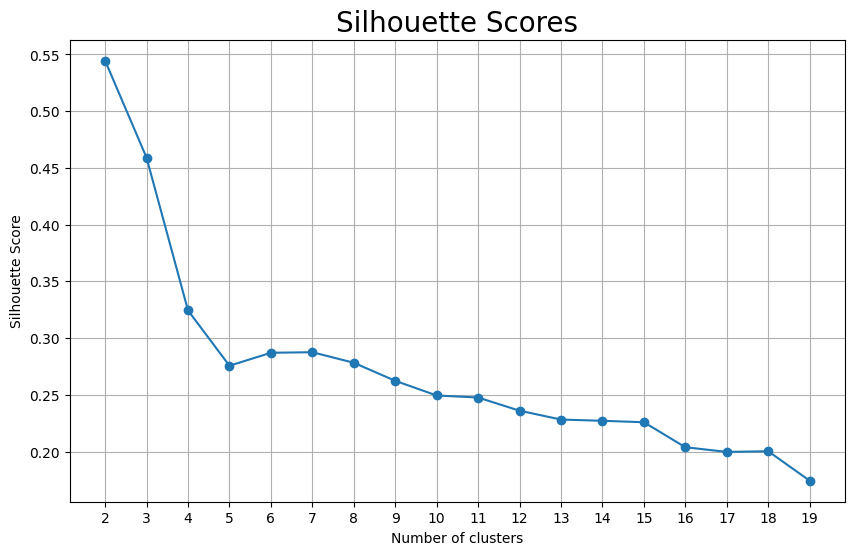

In [7]:
# Display the silhoutte score

plt.figure(figsize=(10, 6))  # Set the figure size as desired
plt.errorbar(clusters, sillhouteScores, yerr=sillhouteError, fmt='-o')  # Plot with error bars and circles at data points
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(clusters)  
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)  
plt.show()  # Display the plot

In [ ]:
# Sillhoute Scores with bottom 20%

clusters = np.arange(2, 20)
sillhouteScores = []
sillhouteError = []
iterations = 20

for i in clusters:
    tempSilhoutteScores = []
    for _ in range(iterations):
        # clustering functions
        LINKAGE = linkage(scaled_data, method='average', metric='euclidean') # calls the hierarchical clustering
        labels = fcluster(LINKAGE, i, criterion='maxclust') # fcluster gives you number of clusters

        silScore = silhouette_score(scaled_data, labels, metric='euclidean') # calculates silhoutte score
        
        tempSilhoutteScores.append(silScore)
    tempSilhoutteScores = np.array(tempSilhoutteScores)

    dx = np.argsort(tempSilhoutteScores)[:int(iterations/5)]
    val = np.mean(tempSilhoutteScores[dx])
    err = np.std(tempSilhoutteScores)
    sillhouteScores.append(val)
    sillhouteError.append(err)

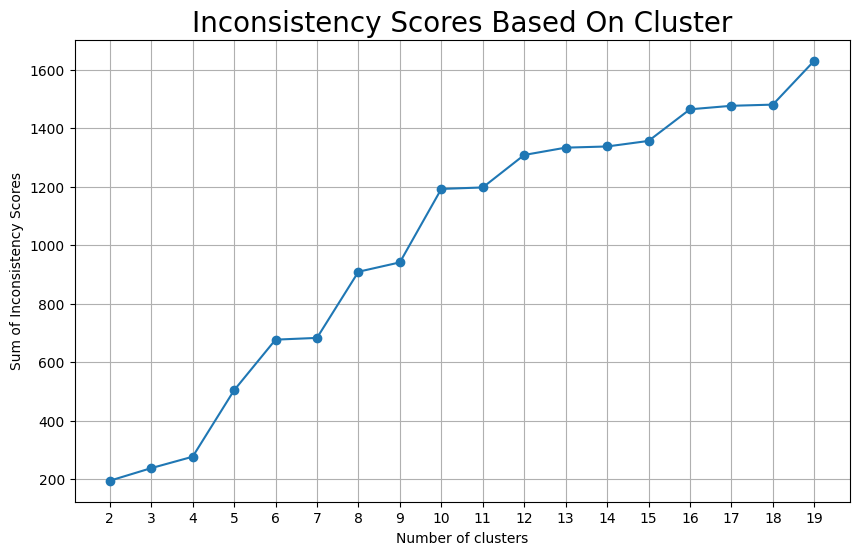

In [29]:
# Try using inconsistency score to find optimal clusters

clusters = np.arange(2, 20)
elbow_values = []
inconsistencyValues = [ ]
depth = 10# depth for calculating inconsistency, idk what it totally does tbh

LINKAGE = linkage(scaled_data, method='complete', metric='euclidean') # calls the hierarchical clustering
inconsistencyScore = inconsistent(LINKAGE, depth) #

for i in clusters:
    labels = fcluster(LINKAGE, i, criterion='maxclust')

    total_inconsistency = np.sum(inconsistencyScore[-(i-1):, -2])
    elbow_values.append(total_inconsistency)


#plot the grid

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(clusters, elbow_values, '-o')
plt.title('Inconsistency Scores Based On Cluster', fontsize=20)
plt.xticks(clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Inconsistency Scores')
plt.grid(True)
plt.show()


In [40]:
# Using 7 clusters

LINKAGE = linkage(scaled_data, method='average', metric='euclidean')

plt.figure(figsize=(120, 20), dpi=300)
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(LINKAGE, labels=symbols.values, leaf_rotation=90, leaf_font_size=8)

# Draw a horizontal line to cut the dendrogram into 7 clusters
maxDistance = 0.6  # Set the maximum distance for clustering
if maxDistance is not None:
    plt.axhline(y=maxDistance, c='k')

plt.show()

# If you want to also retrieve the clusters
if maxDistance is not None:
    clusters = fcluster(LINKAGE, maxDistance, criterion='distance')



In [19]:
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 1, 5, 5, 3, 1, 5, 1, 1, 3,
       1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 5, 1, 3, 5, 6, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 1, 3, 3, 1, 1, 1, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3,
       3, 2, 3, 5, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 3, 6, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 5, 3, 1, 5, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 7, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 6, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 3,
       6, 3, 3, 3, 3, 1, 3, 3, 5, 1, 5, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 4,
       3, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 5, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 1, 5, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,

In [20]:
# see the clustered data

data['Cluster'] = clusters
cluster_1_data = data[data['Cluster'] == 1]
cluster_2_data = data[data['Cluster'] == 2]
cluster_3_data = data[data['Cluster'] == 3]
cluster_4_data = data[data['Cluster'] == 4]

hierarchyData1 = 'cluster1.csv'
hierarchyData2 = 'cluster2.csv'
hierarchyData3 = 'cluster3.csv'
hierarchyData4 = 'cluster4.csv'

cluster_1_data.to_csv(hierarchyData1, index=False)
cluster_2_data.to_csv(hierarchyData2, index=False)
cluster_3_data.to_csv(hierarchyData3, index=False)
cluster_4_data.to_csv(hierarchyData4, index=False)



In [21]:
data

,Symbol,Volume,Market Cap,P/E Ratio,vec0,vec1,vec2,vec3,vec4,Volatility,Cluster
0,IPG,0.201484,0.806974,0.081781,0.239826,0.745115,1.561770,-0.729116,-0.105148,0.3571,3
1,USB,0.162781,0.862048,0.095914,0.253884,0.791067,1.811428,-0.859482,-0.113066,0.3354,3
2,ETR,0.152476,0.828159,0.071237,0.218468,0.773046,1.872523,-0.916396,-0.148009,0.2028,3
3,VRSK,0.125204,0.845854,0.022838,0.213324,0.746491,1.664183,-0.802075,-0.144148,0.1550,3
4,MMC,0.060214,0.882185,0.035331,0.280788,0.922148,2.002150,-0.964473,-0.111175,0.1266,3
...,...,...,...,...,...,...,...,...,...,...,...
497,SRE,0.085163,0.855160,0.060825,0.245355,0.868098,2.035904,-0.950938,-0.127185,0.1898,3
498,WM,0.074332,0.870098,0.033241,0.371892,0.937859,2.094749,-0.974375,-0.111090,0.1793,1
499,MMM,0.134290,0.859901,0.000000,0.245664,0.784547,1.871211,-0.849434,-0.139912,0.2774,3
500,CTRA,0.166738,0.827638,0.147693,0.271487,0.869133,1.958813,-0.884838,-0.197831,0.2453,3


In [22]:
# only get symbol and cluster columns
clusteredData = data[['Symbol', 'Cluster']]
clusteredData

# save to csv
clusteredData.to_csv('hierarchyClusteredData7.csv', index=False)